# 0. npzファイルの読み込みと展開

In [1]:
#cmdやcondaでTensorflowをインストール
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import importlib

In [2]:
npz =  np.load('C:/my_comp_train_XY/my_comp_train_XY.npz')
X_train = npz['X']
y_train = npz['y']

 # 1. データをダウンロードする

In [3]:
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [4]:
y_train

array([0, 0, 0, ..., 9, 9, 9], dtype=uint8)

 # 2. データを分析する

 # 2-1. データラベルの分布の可視化

In [5]:
#ユニークな要素を引数return_countsでカウント
labels, label_count = np.unique(y_train, return_counts=True)
print(labels)
print(label_count)

[0 1 2 3 4 5 6 7 8 9]
[4146 3371 5362 4904 4089 3252 5326 5012 5851 4164]


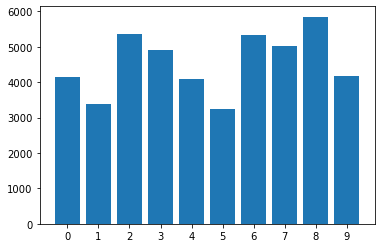

In [6]:
#0から9の画像の分布を表示
plt.bar(labels, label_count)
plt.xticks(range(0,10))
plt.show()

 # 2-2. データ値の範囲の可視化

In [7]:
print(X_train.shape)
print(y_train.shape)

(45477, 28, 28)
(45477,)


In [8]:
#ravel関数による一次元配列の返却
#データの数、高さ、幅の三次元
#今回は写真の枚数、ピクセルの位置を横に並べるイメージ
print(X_train.ravel().shape)

(35653968,)


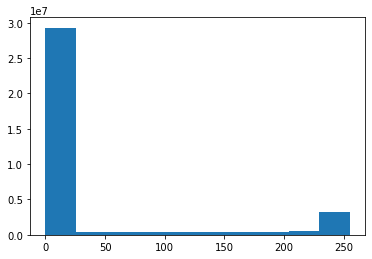

In [9]:
#縦軸：各データの中のピクセルの個数[10^7個]
plt.hist(X_train.ravel())
plt.show()

In [10]:
#欠損値の数の計上
np.isnan(X_train.ravel()).sum()

0

 # 2-3. 画像の表示

In [11]:
import matplotlib as mpl
import matplotlib.pyplot as plt

In [43]:
#(start, end, shape)という形でnoiseのサイズを指定
#randintのdocsを見る、.shapeで確認
noise = np.random.randint(0, 255, (len(X_train), 28, 28))
X_train_mod = X_train + noise
#noise = np.random.randint(0, 100, len(X_valid))
#X_valid_mod = X_valid + noise
y_train_mod = X_train
#y_valid_mod = X_test

In [46]:
len(X_train)

45477

In [44]:
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = mpl.cm.binary,
               interpolation="nearest")
    plt.axis("off")

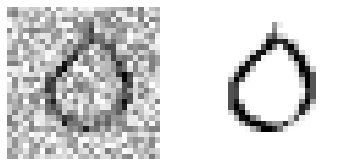

In [45]:
plt.subplot(121); plot_digit(X_train_mod[639])
plt.subplot(122); plot_digit(y_train_mod[639])
plt.show()

In [31]:
noise

19879

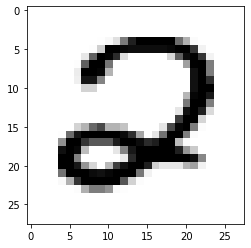

In [13]:
some_digit_01 = X_train[9562]
some_digit_01_image = some_digit_01.reshape(28, 28)
plt.imshow(some_digit_01_image, cmap='binary')
plt.show()

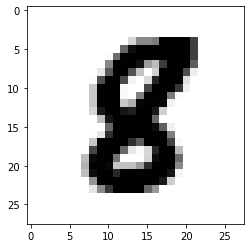

In [14]:
some_digit_02 = X_train[38401]
some_digit_02_image = some_digit_02.reshape(28, 28)
plt.imshow(some_digit_02_image, cmap='binary')
plt.show()

In [15]:
def show_image_by_label(X, y, target_label, show_num=6, figsize=(8,8), random=True):
    X_sub, y_sub= X[y==target_label], y[y==target_label]
    if random:
        rnd_idx = np.random.permutation(len(X_sub))[:show_num]
        X_sub, y_sub = X_sub[rnd_idx], y_sub[rnd_idx]
    X_sub, y_sub = X_sub[:show_num], y_sub[:show_num]
    
    rows, cols = np.ceil(show_num/2), 3
    plt.figure(figsize=figsize)
    print("Showing image with label:{}".format(target_label))
    for i, img in enumerate(X_sub):
        plt.subplot(rows, cols, i+1)
        plt.imshow(img, cmap="gray")
        plt.axis('off')
    plt.show()

Showing image with label:0


<ipython-input-15-6419b0dceb46>:12: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(rows, cols, i+1)


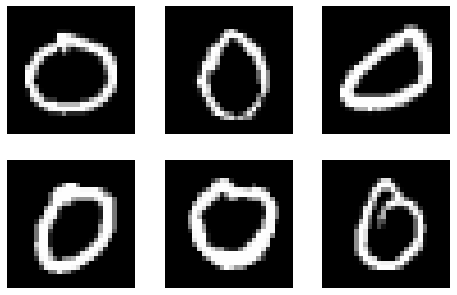

Showing image with label:1


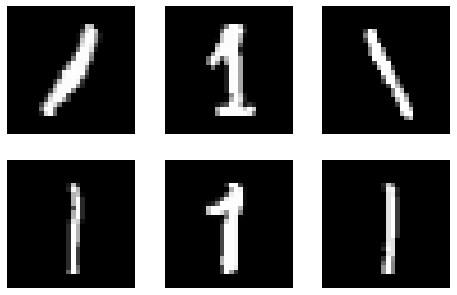

Showing image with label:2


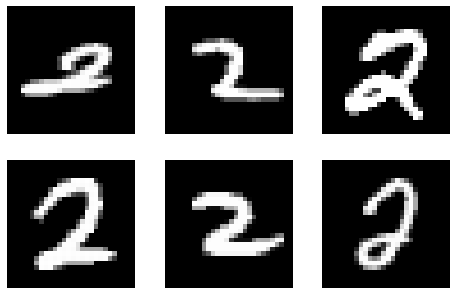

Showing image with label:3


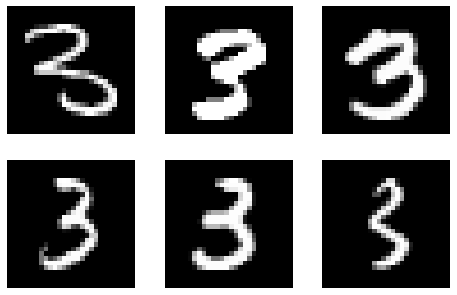

Showing image with label:4


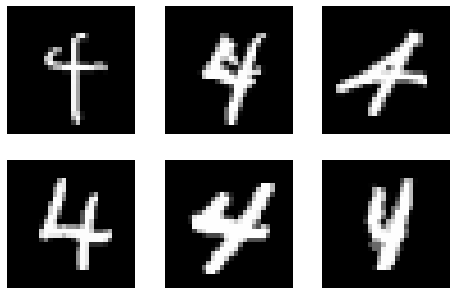

Showing image with label:5


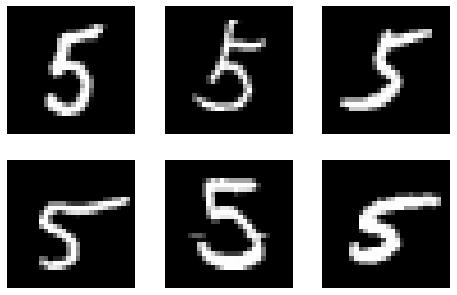

Showing image with label:6


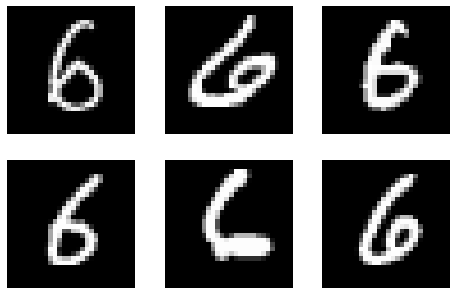

Showing image with label:7


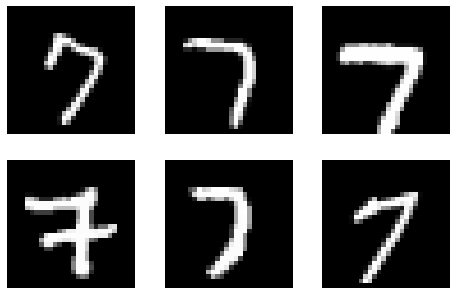

Showing image with label:8


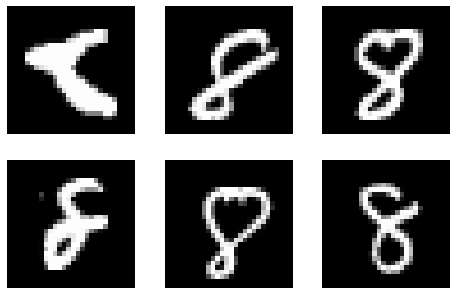

Showing image with label:9


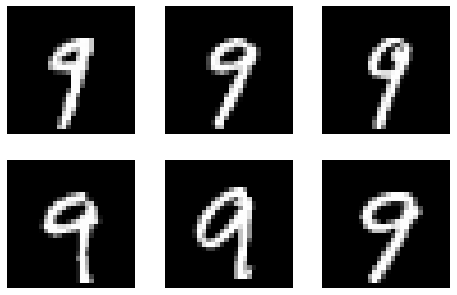

In [16]:
for label in np.unique(y_train):
    show_image_by_label(X_train, y_train, target_label=label)

 # 3. データを前処理する

 # 3-1. 訓練データとテストデータへの分類

In [17]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [18]:
#npzファイルの読み込みと展開
npz = np.load('C:/my_comp_train_XY/my_comp_train_XY.npz')
X_train_raw = npz['X']
y_train_raw = npz['y']

 # 3-2. 標準化・データのレンジ

In [19]:
#ravel()で展開したXのデータを0.0から1.0に標準化
X_train_scaled = X_train_raw/255.
y_train_scaled = y_train_raw.copy()

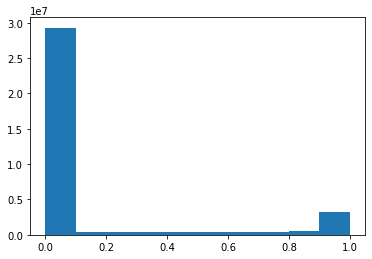

In [20]:
#縦軸：各データの中のピクセルの個数[10^7個]
plt.hist(X_train_scaled.ravel())
plt.show()

In [21]:
#訓練データとテストデータに分ける(引数stratify)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_scaled, y_train_scaled,
                                                      shuffle=True, test_size=0.15, stratify=y_train_scaled)

In [22]:
print("Train data shape, X_train.shape:{} y_train.shape:{}".format(X_train.shape, y_train.shape))
print("Valid data shape, X_valid.shape:{} y_valid.shape:{}".format(X_valid.shape, y_valid.shape))

Train data shape, X_train.shape:(38655, 28, 28) y_train.shape:(38655,)
Valid data shape, X_valid.shape:(6822, 28, 28) y_valid.shape:(6822,)


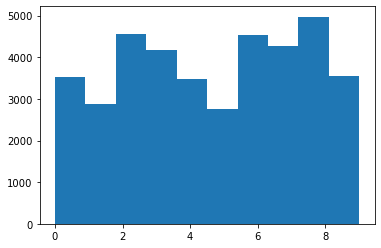

In [23]:
plt.hist(y_train)
plt.show()

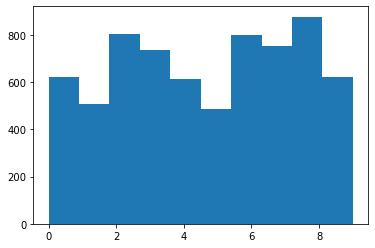

In [24]:
plt.hist(y_valid)
plt.show()

 # 4. 訓練データでモデルを学習する

# 4-1. モデルの選択

In [25]:
#ロジスティック回帰を用いる
X_train_logireg, X_valid_logireg = X_train.reshape(-1, 28*28), X_valid.reshape(-1, 28*28)
print(X_train_logireg.shape)
print(X_valid_logireg.shape)

(38655, 784)
(6822, 784)


In [26]:
#モデルのインスタンス化(テキストp74)
model_logireg = LogisticRegression(verbose=1)

In [27]:
model_logireg.fit(X_train_logireg, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   21.4s finished


LogisticRegression(verbose=1)

 # 5. 精度を評価する

In [28]:
#訓練データとテストデータの精度
y_logireg_train_predictions = model_logireg.predict(X_train_logireg)
y_logireg_valid_predictions = model_logireg.predict(X_valid_logireg)

accuracy_logireg_train = accuracy_score(y_train, y_logireg_train_predictions)
accuracy_logireg_valid = accuracy_score(y_valid, y_logireg_valid_predictions)

print("Train accuracy", accuracy_logireg_train)
print("Valid accuracy", accuracy_logireg_valid)

Train accuracy 0.9399042814642349
Valid accuracy 0.91688654353562


In [72]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import precision_score, recall_score
#from sklearn.metrics import precision_recall_curve
#from sklearn.model_selection import cross_val_score, cross_val_predict

In [30]:
#精度を混同行列で評価する
matrix_logireg_valid = confusion_matrix(y_valid, y_logireg_valid_predictions)

In [31]:
matrix_logireg_valid

array([[596,   0,   3,   3,   2,  10,   4,   1,   3,   0],
       [  0, 490,   3,   2,   0,   3,   0,   2,   5,   1],
       [  1,   6, 741,  10,   8,   4,  11,   9,  12,   2],
       [  3,   4,  18, 654,   1,  27,   2,   7,  17,   3],
       [  2,   1,   8,   0, 564,   0,   4,   2,   5,  27],
       [  9,   2,   4,  13,   2, 425,   8,   2,  18,   5],
       [ 14,   1,  11,   0,   8,   5, 745,   3,  10,   2],
       [  2,   3,  10,   5,   8,   0,   0, 696,   3,  25],
       [  6,  14,  15,  18,   4,  12,   4,   4, 788,  13],
       [  1,   4,   3,  13,  18,   6,   0,  15,   8, 556]], dtype=int64)

混同行列の各行は実際のクラス、各列は予測したクラス
→対角の成分が正しく予測できた件数となる

In [32]:
y_valid.shape

(6822,)

In [33]:
y_logireg_valid_predictions.shape

(6822,)

In [53]:
y_logireg_valid_predictions[3383]

8

In [34]:
#適合率
precision_score(y_valid, y_logireg_valid_predictions, average="macro")
#0か0以外、1か1以外...　と個別に考える

0.9153858303372399

In [35]:
#再現率
recall_score(y_valid, y_logireg_valid_predictions, average="macro")

0.9174241823876775

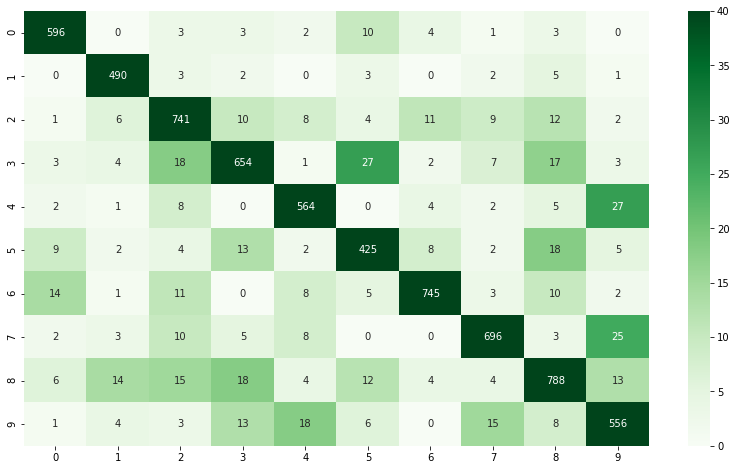

In [36]:
#ヒートマップによる二次元データの可視化
#テストデータy_validが縦軸、予測値y_logireg_valid_predictionsが横軸
#scikit-learnのドキュメントを参照にすること
plt.figure(figsize=(14, 8))
sns.heatmap(matrix_logireg_valid, annot=True, fmt='g', cmap='Greens', vmin=0, vmax=40)
plt.show()

In [71]:
#適合率と再現率のグラフ化
#多クラスでの確率の出力から判別の出力にどう結びつけるかが不可解
#y_scores = cross_val_predict(sgd_clf, X_train, y_valid, y_logireg_valid_predictions, cv=5,
#                             method="decision_function")
#predictions, recalls, thresholds = precision_recall_curve(y_valid, y_logireg_valid_predictions, y_scores)

 # Ramdom Forestを用いた場合

In [37]:
X_train_rndforest, X_valid_rndforest = X_train.reshape(-1, 28*28), X_valid.reshape(-1, 28*28)
print(X_train_rndforest.shape)
print(X_valid_rndforest.shape)

(38655, 784)
(6822, 784)


In [38]:
#モデルのインスタンス化(テキストp74)
model_rndforest = RandomForestClassifier()

In [39]:
model_rndforest.fit(X_train_rndforest, y_train)

RandomForestClassifier()

In [40]:
#訓練データとテストデータの精度
y_rndforest_train_predictions = model_rndforest.predict(X_train_rndforest)
y_rndforest_valid_predictions = model_rndforest.predict(X_valid_rndforest)

accuracy_rndforest_train = accuracy_score(y_train, y_rndforest_train_predictions)
accuracy_rndforest_valid = accuracy_score(y_valid, y_rndforest_valid_predictions)

print("Train accuracy", accuracy_rndforest_train)
print("Valid accuracy", accuracy_rndforest_valid)

Train accuracy 1.0
Valid accuracy 0.9636470243330402


In [73]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import precision_score, recall_score
#from sklearn.metrics import precision_recall_curve

In [42]:
#精度を混同行列で評価する
matrix_rndforest_valid = confusion_matrix(y_valid, y_rndforest_valid_predictions)

In [43]:
matrix_rndforest_valid

array([[610,   0,   1,   1,   0,   0,   1,   0,   9,   0],
       [  0, 498,   2,   2,   2,   0,   0,   1,   1,   0],
       [  1,   1, 791,   0,   0,   1,   3,   4,   2,   1],
       [  0,   2,  18, 698,   0,   5,   1,   4,   7,   1],
       [  1,   0,   4,   0, 586,   0,   4,   1,   4,  13],
       [  2,   0,   1,  11,   0, 459,   4,   0,   4,   7],
       [  3,   1,   2,   0,   1,   5, 779,   0,   8,   0],
       [  0,   8,   3,   1,   3,   0,   0, 723,   2,  12],
       [  2,   4,   9,   2,   2,   3,   1,   0, 847,   8],
       [  2,   2,   1,  10,   8,   1,   0,   5,  12, 583]], dtype=int64)

In [46]:
#適合率
precision_score(y_valid, y_rndforest_valid_predictions, average="macro")

0.9642791865433267

In [48]:
#再現率
recall_score(y_valid, y_rndforest_valid_predictions, average="macro")

0.9629017859112488

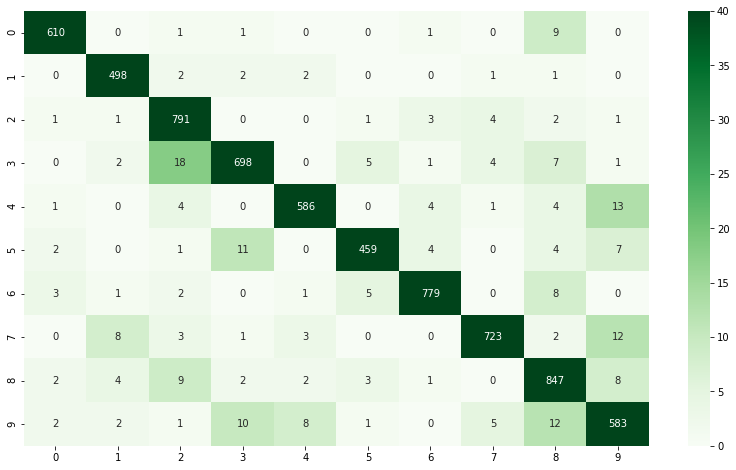

In [49]:
#ヒートマップによる二次元データの可視化
#テストデータy_validが縦軸、予測値y_logireg_valid_predictionsが横軸
#scikit-learnのドキュメントを参照にすること
plt.figure(figsize=(14, 8))
sns.heatmap(matrix_rndforest_valid, annot=True, fmt='g', cmap='Greens', vmin=0, vmax=40)
plt.show()

# 2モデルの比較(logireg & rndforest)

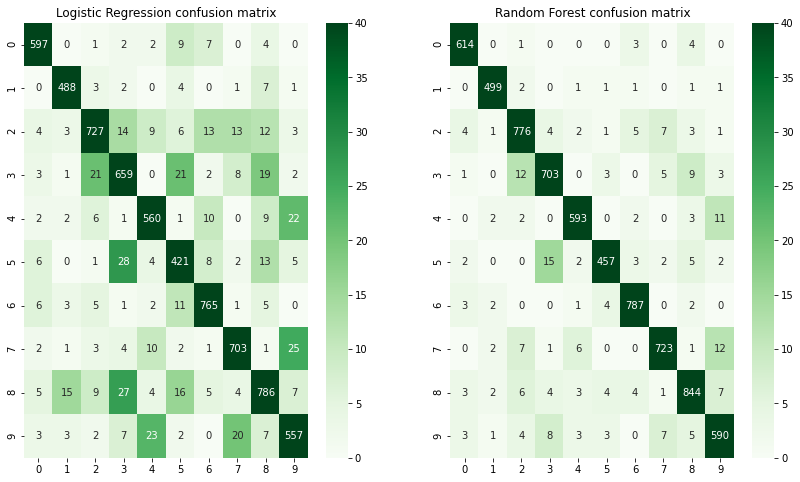

In [41]:
fig, axs = plt.subplots(1, 2, figsize=(14, 8))

map_min, map_max = 0, 40

sns.heatmap(matrix_logireg_valid, annot=True, fmt='g', cmap='Greens', vmin=map_min, vmax=map_max, ax=axs[0])
sns.heatmap(matrix_rndforest_valid, annot=True, fmt='g', cmap='Greens', vmin=map_min, vmax=map_max, ax=axs[1])

axs[0].set_title("Logistic Regression confusion matrix")
axs[1].set_title("Random Forest confusion matrix")
plt.show()

# 6. 再調整

# 6-1. グリッドサーチの総当たりの範囲

In [42]:
#cmdやcondaでTensorflowをインストール

import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    recall_score,
    precision_score,
    f1_score,
    make_scorer,
    confusion_matrix,
)
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [43]:
npz = np.load('C:/my_comp_train_XY/my_comp_train_XY.npz')
X_raw = npz['X']
y_raw = npz['y']

In [44]:
#データの前処理
#訓練データとテストデータに分ける(引数stratify)
X_train_adj, X_valid_adj, y_train_adj, y_valid_adj = train_test_split(X_raw, y_raw,
                                                      shuffle=True, test_size=0.15, stratify=y_raw)
print("Train data shape, X_train.shape:{} y_train.shape:{}".format(X_train_adj.shape, y_train_adj.shape))
print("Train data shape, X_valid.shape:{} y_valid.shape:{}".format(X_valid_adj.shape, y_valid_adj.shape))

Train data shape, X_train.shape:(38655, 28, 28) y_train.shape:(38655,)
Train data shape, X_valid.shape:(6822, 28, 28) y_valid.shape:(6822,)


In [45]:
#ravel()で展開したXのデータを0.0から1.0に標準化
X_train = (X_train_adj/255.).reshape(-1, 28*28)
X_valid = (X_valid_adj/255.).reshape(-1, 28*28)
y_train = y_train_adj.copy().reshape(-1, 1)
y_valid = y_valid_adj.copy().reshape(-1, 1)

 # グリッドサーチ

In [46]:
logireg = LogisticRegression()

param_grid = {
    "penalty":["none", "l2"],
    "C":[0.0, 0.01, 0.1, 0.5, 1.0, 1.5, 2.0, 3.0],
}

scoring = {
    "accuracy": make_scorer(accuracy_score),
    "recall": make_scorer(recall_score, average="micro"),
    "precision": make_scorer(precision_score, average="micro"), 
    "f1": make_scorer(f1_score, average="micro"),
}

#Closs Validationの分割数(デフォルト値は3)
cv = 5
#最良だったパラメタを使って学習データ全体で再学習するかどうか
refit = False
#トレーニングスコアを含むかどうか
return_train_score = True
#ログ出力レベル
verbose = 3

In [47]:
grid_search_v1 = GridSearchCV(
    logireg,
    param_grid,
    scoring=scoring,
    cv=cv,
    refit=refit, 
    return_train_score=return_train_score,
    verbose=verbose)

In [48]:
grid_search_v1.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] C=0.0, penalty=none .............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i =

[CV]  C=0.0, penalty=none, accuracy=(train=0.941, test=0.914), f1=(train=0.941, test=0.914), precision=(train=0.941, test=0.914), recall=(train=0.941, test=0.914), total=  19.9s
[CV] C=0.0, penalty=none .............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   20.1s remaining:    0.0s
C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = 

[CV]  C=0.0, penalty=none, accuracy=(train=0.942, test=0.917), f1=(train=0.942, test=0.917), precision=(train=0.942, test=0.917), recall=(train=0.942, test=0.917), total=  20.1s
[CV] C=0.0, penalty=none .............................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   40.4s remaining:    0.0s
C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = 

[CV]  C=0.0, penalty=none, accuracy=(train=0.942, test=0.914), f1=(train=0.942, test=0.914), precision=(train=0.942, test=0.914), recall=(train=0.942, test=0.914), total=  19.7s
[CV] C=0.0, penalty=none .............................................


C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=0.0, penalty=none, accuracy=(train=0.941, test=0.917), f1=(train=0.941, test=0.917), precision=(train=0.941, test=0.917), recall=(train=0.941, test=0.917), total=  19.7s
[CV] C=0.0, penalty=none .............................................


C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=0.0, penalty=none, accuracy=(train=0.942, test=0.916), f1=(train=0.942, test=0.916), precision=(train=0.942, test=0.916), recall=(train=0.942, test=0.916), total=  20.0s
[CV] C=0.0, penalty=l2 ...............................................
[CV]  C=0.0, penalty=l2, accuracy=(train=nan, test=nan), f1=(train=nan, test=nan), precision=(train=nan, test=nan), recall=(train=nan, test=nan), total=   0.1s
[CV] C=0.0, penalty=l2 ...............................................


C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\takay\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\takay\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1407, in fit
    fold_coefs_ = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\takay\anaconda3\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\User

[CV]  C=0.0, penalty=l2, accuracy=(train=nan, test=nan), f1=(train=nan, test=nan), precision=(train=nan, test=nan), recall=(train=nan, test=nan), total=   0.1s
[CV] C=0.0, penalty=l2 ...............................................
[CV]  C=0.0, penalty=l2, accuracy=(train=nan, test=nan), f1=(train=nan, test=nan), precision=(train=nan, test=nan), recall=(train=nan, test=nan), total=   0.1s
[CV] C=0.0, penalty=l2 ...............................................


C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\takay\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\takay\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1407, in fit
    fold_coefs_ = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\takay\anaconda3\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\User

[CV]  C=0.0, penalty=l2, accuracy=(train=nan, test=nan), f1=(train=nan, test=nan), precision=(train=nan, test=nan), recall=(train=nan, test=nan), total=   0.1s
[CV] C=0.0, penalty=l2 ...............................................
[CV]  C=0.0, penalty=l2, accuracy=(train=nan, test=nan), f1=(train=nan, test=nan), precision=(train=nan, test=nan), recall=(train=nan, test=nan), total=   0.1s
[CV] C=0.01, penalty=none ............................................


C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=0.01, penalty=none, accuracy=(train=0.941, test=0.914), f1=(train=0.941, test=0.914), precision=(train=0.941, test=0.914), recall=(train=0.941, test=0.914), total=  17.3s
[CV] C=0.01, penalty=none ............................................


C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=0.01, penalty=none, accuracy=(train=0.942, test=0.917), f1=(train=0.942, test=0.917), precision=(train=0.942, test=0.917), recall=(train=0.942, test=0.917), total=  17.1s
[CV] C=0.01, penalty=none ............................................


C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=0.01, penalty=none, accuracy=(train=0.942, test=0.914), f1=(train=0.942, test=0.914), precision=(train=0.942, test=0.914), recall=(train=0.942, test=0.914), total=  17.1s
[CV] C=0.01, penalty=none ............................................


C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=0.01, penalty=none, accuracy=(train=0.941, test=0.917), f1=(train=0.941, test=0.917), precision=(train=0.941, test=0.917), recall=(train=0.941, test=0.917), total=  17.1s
[CV] C=0.01, penalty=none ............................................


C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=0.01, penalty=none, accuracy=(train=0.942, test=0.916), f1=(train=0.942, test=0.916), precision=(train=0.942, test=0.916), recall=(train=0.942, test=0.916), total=  17.1s
[CV] C=0.01, penalty=l2 ..............................................


C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=0.01, penalty=l2, accuracy=(train=0.915, test=0.911), f1=(train=0.915, test=0.911), precision=(train=0.915, test=0.911), recall=(train=0.915, test=0.911), total=  18.0s
[CV] C=0.01, penalty=l2 ..............................................


C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=0.01, penalty=l2, accuracy=(train=0.913, test=0.911), f1=(train=0.913, test=0.911), precision=(train=0.913, test=0.911), recall=(train=0.913, test=0.911), total=  17.6s
[CV] C=0.01, penalty=l2 ..............................................


C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=0.01, penalty=l2, accuracy=(train=0.916, test=0.907), f1=(train=0.916, test=0.907), precision=(train=0.916, test=0.907), recall=(train=0.916, test=0.907), total=  17.1s
[CV] C=0.01, penalty=l2 ..............................................


C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=0.01, penalty=l2, accuracy=(train=0.915, test=0.908), f1=(train=0.915, test=0.908), precision=(train=0.915, test=0.908), recall=(train=0.915, test=0.908), total=  17.7s
[CV] C=0.01, penalty=l2 ..............................................


C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=0.01, penalty=l2, accuracy=(train=0.915, test=0.906), f1=(train=0.915, test=0.906), precision=(train=0.915, test=0.906), recall=(train=0.915, test=0.906), total=  17.6s
[CV] C=0.1, penalty=none .............................................


C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=0.1, penalty=none, accuracy=(train=0.941, test=0.914), f1=(train=0.941, test=0.914), precision=(train=0.941, test=0.914), recall=(train=0.941, test=0.914), total=  18.8s
[CV] C=0.1, penalty=none .............................................


C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=0.1, penalty=none, accuracy=(train=0.942, test=0.917), f1=(train=0.942, test=0.917), precision=(train=0.942, test=0.917), recall=(train=0.942, test=0.917), total=  17.6s
[CV] C=0.1, penalty=none .............................................


C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=0.1, penalty=none, accuracy=(train=0.942, test=0.914), f1=(train=0.942, test=0.914), precision=(train=0.942, test=0.914), recall=(train=0.942, test=0.914), total=  17.1s
[CV] C=0.1, penalty=none .............................................


C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=0.1, penalty=none, accuracy=(train=0.941, test=0.917), f1=(train=0.941, test=0.917), precision=(train=0.941, test=0.917), recall=(train=0.941, test=0.917), total=  17.0s
[CV] C=0.1, penalty=none .............................................


C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=0.1, penalty=none, accuracy=(train=0.942, test=0.916), f1=(train=0.942, test=0.916), precision=(train=0.942, test=0.916), recall=(train=0.942, test=0.916), total=  19.6s
[CV] C=0.1, penalty=l2 ...............................................


C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=0.1, penalty=l2, accuracy=(train=0.933, test=0.920), f1=(train=0.933, test=0.920), precision=(train=0.933, test=0.920), recall=(train=0.933, test=0.920), total=  19.1s
[CV] C=0.1, penalty=l2 ...............................................


C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=0.1, penalty=l2, accuracy=(train=0.933, test=0.918), f1=(train=0.933, test=0.918), precision=(train=0.933, test=0.918), recall=(train=0.933, test=0.918), total=  18.4s
[CV] C=0.1, penalty=l2 ...............................................


C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=0.1, penalty=l2, accuracy=(train=0.934, test=0.919), f1=(train=0.934, test=0.919), precision=(train=0.934, test=0.919), recall=(train=0.934, test=0.919), total=  19.0s
[CV] C=0.1, penalty=l2 ...............................................


C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=0.1, penalty=l2, accuracy=(train=0.933, test=0.920), f1=(train=0.933, test=0.920), precision=(train=0.933, test=0.920), recall=(train=0.933, test=0.920), total=  17.0s
[CV] C=0.1, penalty=l2 ...............................................


C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=0.1, penalty=l2, accuracy=(train=0.933, test=0.918), f1=(train=0.933, test=0.918), precision=(train=0.933, test=0.918), recall=(train=0.933, test=0.918), total=  17.4s
[CV] C=0.5, penalty=none .............................................


C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=0.5, penalty=none, accuracy=(train=0.941, test=0.914), f1=(train=0.941, test=0.914), precision=(train=0.941, test=0.914), recall=(train=0.941, test=0.914), total=  18.7s
[CV] C=0.5, penalty=none .............................................


C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=0.5, penalty=none, accuracy=(train=0.942, test=0.917), f1=(train=0.942, test=0.917), precision=(train=0.942, test=0.917), recall=(train=0.942, test=0.917), total=  18.2s
[CV] C=0.5, penalty=none .............................................


C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=0.5, penalty=none, accuracy=(train=0.942, test=0.914), f1=(train=0.942, test=0.914), precision=(train=0.942, test=0.914), recall=(train=0.942, test=0.914), total=  19.0s
[CV] C=0.5, penalty=none .............................................


C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=0.5, penalty=none, accuracy=(train=0.941, test=0.917), f1=(train=0.941, test=0.917), precision=(train=0.941, test=0.917), recall=(train=0.941, test=0.917), total=  17.3s
[CV] C=0.5, penalty=none .............................................


C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=0.5, penalty=none, accuracy=(train=0.942, test=0.916), f1=(train=0.942, test=0.916), precision=(train=0.942, test=0.916), recall=(train=0.942, test=0.916), total=  17.2s
[CV] C=0.5, penalty=l2 ...............................................


C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=0.5, penalty=l2, accuracy=(train=0.940, test=0.917), f1=(train=0.940, test=0.917), precision=(train=0.940, test=0.917), recall=(train=0.940, test=0.917), total=  17.5s
[CV] C=0.5, penalty=l2 ...............................................


C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=0.5, penalty=l2, accuracy=(train=0.941, test=0.918), f1=(train=0.941, test=0.918), precision=(train=0.941, test=0.918), recall=(train=0.941, test=0.918), total=  17.1s
[CV] C=0.5, penalty=l2 ...............................................


C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=0.5, penalty=l2, accuracy=(train=0.940, test=0.920), f1=(train=0.940, test=0.920), precision=(train=0.940, test=0.920), recall=(train=0.940, test=0.920), total=  17.7s
[CV] C=0.5, penalty=l2 ...............................................


C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=0.5, penalty=l2, accuracy=(train=0.939, test=0.921), f1=(train=0.939, test=0.921), precision=(train=0.939, test=0.921), recall=(train=0.939, test=0.921), total=  19.0s
[CV] C=0.5, penalty=l2 ...............................................


C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=0.5, penalty=l2, accuracy=(train=0.940, test=0.918), f1=(train=0.940, test=0.918), precision=(train=0.940, test=0.918), recall=(train=0.940, test=0.918), total=  19.4s
[CV] C=1.0, penalty=none .............................................


C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=1.0, penalty=none, accuracy=(train=0.941, test=0.914), f1=(train=0.941, test=0.914), precision=(train=0.941, test=0.914), recall=(train=0.941, test=0.914), total=  22.3s
[CV] C=1.0, penalty=none .............................................


C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=1.0, penalty=none, accuracy=(train=0.942, test=0.917), f1=(train=0.942, test=0.917), precision=(train=0.942, test=0.917), recall=(train=0.942, test=0.917), total=  17.6s
[CV] C=1.0, penalty=none .............................................


C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=1.0, penalty=none, accuracy=(train=0.942, test=0.914), f1=(train=0.942, test=0.914), precision=(train=0.942, test=0.914), recall=(train=0.942, test=0.914), total=  18.0s
[CV] C=1.0, penalty=none .............................................


C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=1.0, penalty=none, accuracy=(train=0.941, test=0.917), f1=(train=0.941, test=0.917), precision=(train=0.941, test=0.917), recall=(train=0.941, test=0.917), total=  17.8s
[CV] C=1.0, penalty=none .............................................


C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=1.0, penalty=none, accuracy=(train=0.942, test=0.916), f1=(train=0.942, test=0.916), precision=(train=0.942, test=0.916), recall=(train=0.942, test=0.916), total=  17.4s
[CV] C=1.0, penalty=l2 ...............................................


C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=1.0, penalty=l2, accuracy=(train=0.941, test=0.917), f1=(train=0.941, test=0.917), precision=(train=0.941, test=0.917), recall=(train=0.941, test=0.917), total=  16.9s
[CV] C=1.0, penalty=l2 ...............................................


C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=1.0, penalty=l2, accuracy=(train=0.942, test=0.917), f1=(train=0.942, test=0.917), precision=(train=0.942, test=0.917), recall=(train=0.942, test=0.917), total=  18.5s
[CV] C=1.0, penalty=l2 ...............................................


C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=1.0, penalty=l2, accuracy=(train=0.941, test=0.918), f1=(train=0.941, test=0.918), precision=(train=0.941, test=0.918), recall=(train=0.941, test=0.918), total=  17.6s
[CV] C=1.0, penalty=l2 ...............................................


C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=1.0, penalty=l2, accuracy=(train=0.940, test=0.920), f1=(train=0.940, test=0.920), precision=(train=0.940, test=0.920), recall=(train=0.940, test=0.920), total=  17.0s
[CV] C=1.0, penalty=l2 ...............................................


C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=1.0, penalty=l2, accuracy=(train=0.940, test=0.917), f1=(train=0.940, test=0.917), precision=(train=0.940, test=0.917), recall=(train=0.940, test=0.917), total=  18.4s
[CV] C=1.5, penalty=none .............................................


C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=1.5, penalty=none, accuracy=(train=0.941, test=0.914), f1=(train=0.941, test=0.914), precision=(train=0.941, test=0.914), recall=(train=0.941, test=0.914), total=  17.6s
[CV] C=1.5, penalty=none .............................................


C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=1.5, penalty=none, accuracy=(train=0.942, test=0.917), f1=(train=0.942, test=0.917), precision=(train=0.942, test=0.917), recall=(train=0.942, test=0.917), total=  18.3s
[CV] C=1.5, penalty=none .............................................


C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=1.5, penalty=none, accuracy=(train=0.942, test=0.914), f1=(train=0.942, test=0.914), precision=(train=0.942, test=0.914), recall=(train=0.942, test=0.914), total=  17.4s
[CV] C=1.5, penalty=none .............................................


C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=1.5, penalty=none, accuracy=(train=0.941, test=0.917), f1=(train=0.941, test=0.917), precision=(train=0.941, test=0.917), recall=(train=0.941, test=0.917), total=  17.5s
[CV] C=1.5, penalty=none .............................................


C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=1.5, penalty=none, accuracy=(train=0.942, test=0.916), f1=(train=0.942, test=0.916), precision=(train=0.942, test=0.916), recall=(train=0.942, test=0.916), total=  20.3s
[CV] C=1.5, penalty=l2 ...............................................


C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=1.5, penalty=l2, accuracy=(train=0.941, test=0.916), f1=(train=0.941, test=0.916), precision=(train=0.941, test=0.916), recall=(train=0.941, test=0.916), total=  17.5s
[CV] C=1.5, penalty=l2 ...............................................


C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=1.5, penalty=l2, accuracy=(train=0.942, test=0.918), f1=(train=0.942, test=0.918), precision=(train=0.942, test=0.918), recall=(train=0.942, test=0.918), total=  18.4s
[CV] C=1.5, penalty=l2 ...............................................


C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=1.5, penalty=l2, accuracy=(train=0.941, test=0.918), f1=(train=0.941, test=0.918), precision=(train=0.941, test=0.918), recall=(train=0.941, test=0.918), total=  17.9s
[CV] C=1.5, penalty=l2 ...............................................


C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=1.5, penalty=l2, accuracy=(train=0.940, test=0.919), f1=(train=0.940, test=0.919), precision=(train=0.940, test=0.919), recall=(train=0.940, test=0.919), total=  18.1s
[CV] C=1.5, penalty=l2 ...............................................


C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=1.5, penalty=l2, accuracy=(train=0.942, test=0.915), f1=(train=0.942, test=0.915), precision=(train=0.942, test=0.915), recall=(train=0.942, test=0.915), total=  18.8s
[CV] C=2.0, penalty=none .............................................


C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=2.0, penalty=none, accuracy=(train=0.941, test=0.914), f1=(train=0.941, test=0.914), precision=(train=0.941, test=0.914), recall=(train=0.941, test=0.914), total=  17.5s
[CV] C=2.0, penalty=none .............................................


C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=2.0, penalty=none, accuracy=(train=0.942, test=0.917), f1=(train=0.942, test=0.917), precision=(train=0.942, test=0.917), recall=(train=0.942, test=0.917), total=  16.9s
[CV] C=2.0, penalty=none .............................................


C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=2.0, penalty=none, accuracy=(train=0.942, test=0.914), f1=(train=0.942, test=0.914), precision=(train=0.942, test=0.914), recall=(train=0.942, test=0.914), total=  17.6s
[CV] C=2.0, penalty=none .............................................


C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=2.0, penalty=none, accuracy=(train=0.941, test=0.917), f1=(train=0.941, test=0.917), precision=(train=0.941, test=0.917), recall=(train=0.941, test=0.917), total=  17.1s
[CV] C=2.0, penalty=none .............................................


C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=2.0, penalty=none, accuracy=(train=0.942, test=0.916), f1=(train=0.942, test=0.916), precision=(train=0.942, test=0.916), recall=(train=0.942, test=0.916), total=  18.5s
[CV] C=2.0, penalty=l2 ...............................................


C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=2.0, penalty=l2, accuracy=(train=0.941, test=0.916), f1=(train=0.941, test=0.916), precision=(train=0.941, test=0.916), recall=(train=0.941, test=0.916), total=  19.2s
[CV] C=2.0, penalty=l2 ...............................................


C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=2.0, penalty=l2, accuracy=(train=0.941, test=0.916), f1=(train=0.941, test=0.916), precision=(train=0.941, test=0.916), recall=(train=0.941, test=0.916), total=  19.3s
[CV] C=2.0, penalty=l2 ...............................................


C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=2.0, penalty=l2, accuracy=(train=0.941, test=0.917), f1=(train=0.941, test=0.917), precision=(train=0.941, test=0.917), recall=(train=0.941, test=0.917), total=  18.0s
[CV] C=2.0, penalty=l2 ...............................................


C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=2.0, penalty=l2, accuracy=(train=0.941, test=0.919), f1=(train=0.941, test=0.919), precision=(train=0.941, test=0.919), recall=(train=0.941, test=0.919), total=  18.5s
[CV] C=2.0, penalty=l2 ...............................................


C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=2.0, penalty=l2, accuracy=(train=0.941, test=0.917), f1=(train=0.941, test=0.917), precision=(train=0.941, test=0.917), recall=(train=0.941, test=0.917), total=  19.7s
[CV] C=3.0, penalty=none .............................................


C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=3.0, penalty=none, accuracy=(train=0.941, test=0.914), f1=(train=0.941, test=0.914), precision=(train=0.941, test=0.914), recall=(train=0.941, test=0.914), total=  18.0s
[CV] C=3.0, penalty=none .............................................


C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=3.0, penalty=none, accuracy=(train=0.942, test=0.917), f1=(train=0.942, test=0.917), precision=(train=0.942, test=0.917), recall=(train=0.942, test=0.917), total=  18.2s
[CV] C=3.0, penalty=none .............................................


C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=3.0, penalty=none, accuracy=(train=0.942, test=0.914), f1=(train=0.942, test=0.914), precision=(train=0.942, test=0.914), recall=(train=0.942, test=0.914), total=  17.5s
[CV] C=3.0, penalty=none .............................................


C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=3.0, penalty=none, accuracy=(train=0.941, test=0.917), f1=(train=0.941, test=0.917), precision=(train=0.941, test=0.917), recall=(train=0.941, test=0.917), total=  18.9s
[CV] C=3.0, penalty=none .............................................


C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=3.0, penalty=none, accuracy=(train=0.942, test=0.916), f1=(train=0.942, test=0.916), precision=(train=0.942, test=0.916), recall=(train=0.942, test=0.916), total=  18.2s
[CV] C=3.0, penalty=l2 ...............................................


C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=3.0, penalty=l2, accuracy=(train=0.942, test=0.915), f1=(train=0.942, test=0.915), precision=(train=0.942, test=0.915), recall=(train=0.942, test=0.915), total=  19.2s
[CV] C=3.0, penalty=l2 ...............................................


C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=3.0, penalty=l2, accuracy=(train=0.942, test=0.917), f1=(train=0.942, test=0.917), precision=(train=0.942, test=0.917), recall=(train=0.942, test=0.917), total=  17.9s
[CV] C=3.0, penalty=l2 ...............................................


C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=3.0, penalty=l2, accuracy=(train=0.941, test=0.917), f1=(train=0.941, test=0.917), precision=(train=0.941, test=0.917), recall=(train=0.941, test=0.917), total=  17.1s
[CV] C=3.0, penalty=l2 ...............................................


C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=3.0, penalty=l2, accuracy=(train=0.941, test=0.918), f1=(train=0.941, test=0.918), precision=(train=0.941, test=0.918), recall=(train=0.941, test=0.918), total=  17.3s
[CV] C=3.0, penalty=l2 ...............................................


C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=3.0, penalty=l2, accuracy=(train=0.942, test=0.915), f1=(train=0.942, test=0.915), precision=(train=0.942, test=0.915), recall=(train=0.942, test=0.915), total=  17.2s


[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed: 23.0min finished


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.0, 0.01, 0.1, 0.5, 1.0, 1.5, 2.0, 3.0],
                         'penalty': ['none', 'l2']},
             refit=False, return_train_score=True,
             scoring={'accuracy': make_scorer(accuracy_score),
                      'f1': make_scorer(f1_score, average=micro),
                      'precision': make_scorer(precision_score, average=micro),
                      'recall': make_scorer(recall_score, average=micro)},
             verbose=3)

In [49]:
grid_search_v1.cv_results_

{'mean_fit_time': array([19.82849422,  0.13391314, 17.09783082, 17.54168911, 17.97076044,
        18.12907   , 18.03314471, 18.10098753, 18.56519251, 17.6451272 ,
        18.16999311, 18.11111603, 17.47841158, 18.90240064, 18.13048406,
        17.67148738]),
 'std_fit_time': array([0.16600331, 0.00281116, 0.06996851, 0.29269096, 1.0191947 ,
        0.84329383, 0.70636956, 0.86315323, 1.86041333, 0.69403897,
        1.06532377, 0.44071742, 0.54979377, 0.58999293, 0.43664176,
        0.76846188]),
 'mean_score_time': array([0.05438223, 0.        , 0.04663906, 0.04966402, 0.04809246,
        0.04993992, 0.04897881, 0.05091486, 0.04989548, 0.0477149 ,
        0.05287471, 0.05035458, 0.04871774, 0.05185442, 0.04580779,
        0.05274301]),
 'std_score_time': array([0.00288237, 0.        , 0.00194652, 0.00278195, 0.00401373,
        0.00475533, 0.00346644, 0.00677374, 0.00773271, 0.0044591 ,
        0.00732381, 0.00956087, 0.00230646, 0.00549169, 0.00437974,
        0.00550004]),
 'param_C'

In [50]:
params = grid_search_v1.cv_results_['params']
accuracy_list = grid_search_v1.cv_results_['mean_test_accuracy']

result_list = []
for param, accuracy in zip(params, accuracy_list):
    param["test_acc"] = accuracy
    result_list.append(param)

In [51]:
result_list

[{'C': 0.0, 'penalty': 'none', 'test_acc': 0.9158194282757728},
 {'C': 0.0, 'penalty': 'l2', 'test_acc': nan},
 {'C': 0.01, 'penalty': 'none', 'test_acc': 0.9158194282757728},
 {'C': 0.01, 'penalty': 'l2', 'test_acc': 0.9086017332815937},
 {'C': 0.1, 'penalty': 'none', 'test_acc': 0.9158194282757728},
 {'C': 0.1, 'penalty': 'l2', 'test_acc': 0.9190790324666926},
 {'C': 0.5, 'penalty': 'none', 'test_acc': 0.9158194282757728},
 {'C': 0.5, 'penalty': 'l2', 'test_acc': 0.9191307722157548},
 {'C': 1.0, 'penalty': 'none', 'test_acc': 0.9158194282757728},
 {'C': 1.0, 'penalty': 'l2', 'test_acc': 0.9178890182382616},
 {'C': 1.5, 'penalty': 'none', 'test_acc': 0.9158194282757728},
 {'C': 1.5, 'penalty': 'l2', 'test_acc': 0.9169318328806104},
 {'C': 2.0, 'penalty': 'none', 'test_acc': 0.9158194282757728},
 {'C': 2.0, 'penalty': 'l2', 'test_acc': 0.917268141249515},
 {'C': 3.0, 'penalty': 'none', 'test_acc': 0.9158194282757728},
 {'C': 3.0, 'penalty': 'l2', 'test_acc': 0.9164403052645195}]

In [52]:
df_result_v1 = pd.DataFrame(result_list)

In [53]:
df_result_v1

,C,penalty,test_acc
0,0.00,none,0.915819
1,0.00,l2,NaN
2,0.01,none,0.915819
3,0.01,l2,0.908602
4,0.10,none,0.915819
5,0.10,l2,0.919079
6,0.50,none,0.915819
7,0.50,l2,0.919131
8,1.00,none,0.915819
9,1.00,l2,0.917889


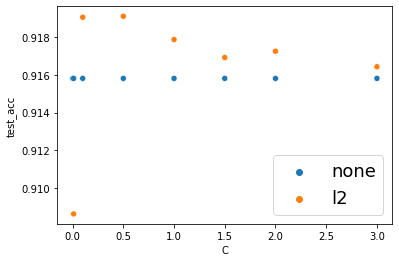

In [54]:
sns.scatterplot(data=df_result_v1, x="C", y="test_acc", hue="penalty")
plt.legend(loc= 'lower right', fontsize=18)
plt.show()
#plt("-x")でつなぐ

ロジスティック回帰では、C=0.50のとき精度が最も高いという結果が得られた。

# 6-2. データの拡張性を検討する

In [55]:
#データの拡張(Data Augmentation)
#画像の反転、水平シフトの割合、画素の埋め方
data_augmenter = ImageDataGenerator(
                    rotation_range = 15,
                    width_shift_range = 0.15,
                    height_shift_range = 0.15,
                    fill_mode = "constant")

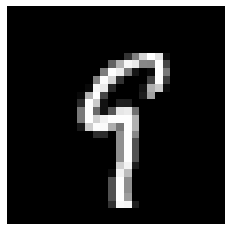

In [91]:
rnd_idx = np.random.randint(len(X_train_adj))
X_sample = X_train_adj[[rnd_idx]]
plt.imshow(X_sample[0], cmap="gray")
plt.axis('off')
plt.show()

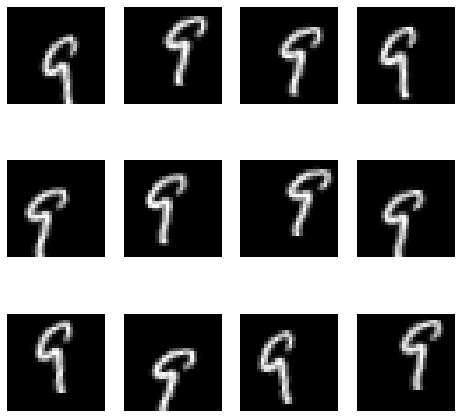

In [92]:
plt.figure(figsize=(8,8))
for i, X_batch in enumerate(data_augmenter.flow(X_sample[:,:,:,np.newaxis])):
    if i==12:
        break
    plt.subplot(3, 4,i+1)
    plt.imshow(X_batch[0,:,:,0], cmap="gray")
    plt.axis('off')
plt.show()

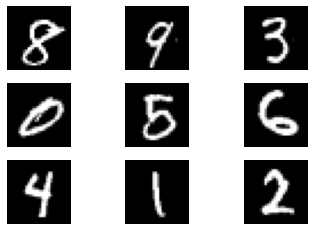

In [93]:
X_sample = X_train_adj[0:9]
for i, X in enumerate(X_sample):
    plt.subplot(3, 3, i+1)
    plt.imshow(X, cmap="gray")
    plt.axis('off')
plt.show()

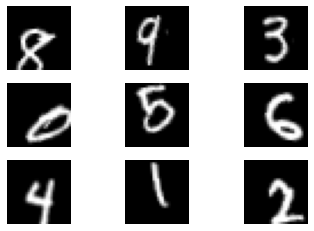

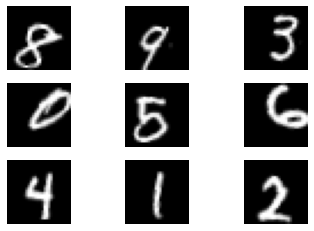

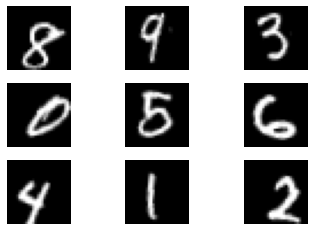

In [94]:
for i, X_batch in enumerate(data_augmenter.flow(X_sample[:,:,:,np.newaxis], shuffle=False, batch_size=12)):
    if i ==3:
        break
    for j, X in enumerate(X_batch):
        plt.subplot(3, 3, j+1)
        plt.imshow(X[:,:,0], cmap="gray")
        plt.axis('off')
    plt.show() 

In [95]:
#データの拡張を実行する

X_train_augmented = X_train_adj[:,:,:,np.newaxis].copy()
y_train_augmented = y_train_adj.copy()

for i, (X_batch, y_batch) in enumerate(data_augmenter.flow(X_train_adj[:,:,:,np.newaxis], y_train_adj, batch_size=len(X_train_adj), shuffle=False)):
    if i==2:
        break
    #多次元配列の結合
    X_train_augmented = np.r_[X_train_augmented, X_batch]
    y_train_augmented = np.r_[y_train_augmented, y_batch]

In [96]:
print("X_train_augmented.shape:{}".format(X_train_augmented.shape))
print("y_train_augmented.shape:{}".format(y_train_augmented.shape))

X_train_augmented.shape:(115965, 28, 28, 1)
y_train_augmented.shape:(115965,)


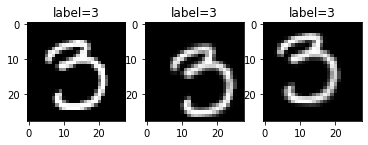

In [97]:
adj_img_num=len(X_train_adj)
rnd_idx = np.random.randint(adj_img_num)
group_idx = [adj_img_num*idx + rnd_idx for idx in range(3)]

for i, show_idx in enumerate(group_idx):
    plt.subplot(1, 3, i+1)
    plt.imshow(X_train_augmented[show_idx,:,:,0], cmap="gray")
    plt.title("label={}".format(y_train_augmented[show_idx]))
plt.show()

In [98]:
#ravel()で展開したXのデータを0.0から1.0に標準化
X_train_augscaled = (X_train_augmented/255.).reshape(-1, 28*28)
y_train_augscaled = y_train_augmented.copy().reshape(-1, 1)
print("X_train_augmented.shape:{}".format(X_train_augscaled.shape))
print("y_train_augmented.shape:{}".format(y_train_augscaled.shape))

X_train_augmented.shape:(115965, 784)
y_train_augmented.shape:(115965, 1)


In [100]:
#グリッドサーチ
logireg = LogisticRegression()

param_grid_2 = {
    "penalty":["l2"],
    "C":[0.01, 0.1, 0.5, 1.0, 1.5],
}

scoring = {"accuracy"}

#Closs Validationの分割数(デフォルト値は3)
cv = 5
#最良だったパラメタを使って学習データ全体で再学習するかどうか
refit = False
#トレーニングスコアを含むかどうか
return_train_score = True
#ログ出力レベル
verbose = 3

In [101]:
grid_search_v2 = GridSearchCV(
    logireg,
    param_grid_2,
    scoring=scoring,
    cv=cv,
    refit=refit, 
    return_train_score=return_train_score,
    verbose=verbose)

In [102]:
grid_search_v2.fit(X_train_augscaled, y_train_augscaled)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] C=0.01, penalty=l2 ..............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=0.01, penalty=l2, accuracy=(train=0.589, test=0.807), total=  48.0s
[CV] C=0.01, penalty=l2 ..............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   48.7s remaining:    0.0s
C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=0.01, penalty=l2, accuracy=(train=0.611, test=0.728), total=  47.7s
[CV] C=0.01, penalty=l2 ..............................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  1.6min remaining:    0.0s
C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=0.01, penalty=l2, accuracy=(train=0.662, test=0.514), total=  51.2s
[CV] C=0.01, penalty=l2 ..............................................


C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=0.01, penalty=l2, accuracy=(train=0.662, test=0.509), total=  48.5s
[CV] C=0.01, penalty=l2 ..............................................


C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=0.01, penalty=l2, accuracy=(train=0.664, test=0.510), total=  52.3s
[CV] C=0.1, penalty=l2 ...............................................


C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=0.1, penalty=l2, accuracy=(train=0.599, test=0.804), total=  49.2s
[CV] C=0.1, penalty=l2 ...............................................


C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=0.1, penalty=l2, accuracy=(train=0.622, test=0.729), total=  56.7s
[CV] C=0.1, penalty=l2 ...............................................


C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=0.1, penalty=l2, accuracy=(train=0.672, test=0.529), total= 1.1min
[CV] C=0.1, penalty=l2 ...............................................


C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=0.1, penalty=l2, accuracy=(train=0.675, test=0.522), total=  52.5s
[CV] C=0.1, penalty=l2 ...............................................


C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=0.1, penalty=l2, accuracy=(train=0.675, test=0.526), total=  49.3s
[CV] C=0.5, penalty=l2 ...............................................


C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=0.5, penalty=l2, accuracy=(train=0.600, test=0.800), total=  49.3s
[CV] C=0.5, penalty=l2 ...............................................


C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=0.5, penalty=l2, accuracy=(train=0.622, test=0.728), total=  49.8s
[CV] C=0.5, penalty=l2 ...............................................


C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=0.5, penalty=l2, accuracy=(train=0.674, test=0.529), total=  54.8s
[CV] C=0.5, penalty=l2 ...............................................


C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=0.5, penalty=l2, accuracy=(train=0.676, test=0.526), total=  55.8s
[CV] C=0.5, penalty=l2 ...............................................


C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=0.5, penalty=l2, accuracy=(train=0.676, test=0.527), total=  48.5s
[CV] C=1.0, penalty=l2 ...............................................


C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=1.0, penalty=l2, accuracy=(train=0.601, test=0.801), total=  54.8s
[CV] C=1.0, penalty=l2 ...............................................


C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=1.0, penalty=l2, accuracy=(train=0.623, test=0.727), total=  51.6s
[CV] C=1.0, penalty=l2 ...............................................


C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=1.0, penalty=l2, accuracy=(train=0.674, test=0.531), total=  51.7s
[CV] C=1.0, penalty=l2 ...............................................


C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=1.0, penalty=l2, accuracy=(train=0.675, test=0.525), total=  52.2s
[CV] C=1.0, penalty=l2 ...............................................


C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=1.0, penalty=l2, accuracy=(train=0.676, test=0.527), total=  50.7s
[CV] C=1.5, penalty=l2 ...............................................


C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=1.5, penalty=l2, accuracy=(train=0.601, test=0.802), total=  53.3s
[CV] C=1.5, penalty=l2 ...............................................


C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=1.5, penalty=l2, accuracy=(train=0.623, test=0.728), total=  49.6s
[CV] C=1.5, penalty=l2 ...............................................


C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=1.5, penalty=l2, accuracy=(train=0.674, test=0.531), total=  53.6s
[CV] C=1.5, penalty=l2 ...............................................


C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=1.5, penalty=l2, accuracy=(train=0.676, test=0.524), total=  58.4s
[CV] C=1.5, penalty=l2 ...............................................


C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=1.5, penalty=l2, accuracy=(train=0.676, test=0.526), total=  59.0s


[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed: 22.2min finished


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 0.5, 1.0, 1.5], 'penalty': ['l2']},
             refit=False, return_train_score=True, scoring={'accuracy'},
             verbose=3)

In [103]:
params = grid_search_v2.cv_results_['params']
accuracy_list = grid_search_v2.cv_results_['mean_test_accuracy']


result_list_v2 = []
for param, accuracy in zip(params, accuracy_list):
    param["test_acc"] = accuracy
    result_list_v2.append(param)

In [104]:
df_result_v2 = pd.DataFrame(result_list_v2)

In [105]:
df_result_v2

,C,penalty,test_acc
0,0.01,l2,0.613616
1,0.10,l2,0.621981
2,0.50,l2,0.622050
3,1.00,l2,0.622162
4,1.50,l2,0.622369


端点が最大値ではグリッドサーチ失敗？

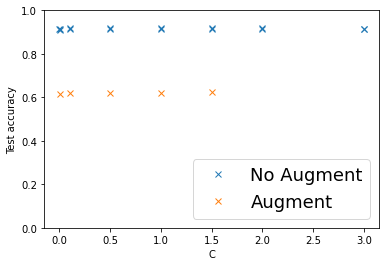

In [109]:

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

ax.set_ylim([0, 1.0])
ax.set_xlabel("C")
ax.set_ylabel("Test accuracy")
ax.plot('C', 'test_acc', data=df_result_v1, label='No Augment', marker="x", linestyle="none")
ax.plot('C', 'test_acc', data=df_result_v2, label='Augment', marker="x", linestyle="none")

plt.legend(loc= 'lower right', fontsize=18)
plt.show()